# Lab 4: EDA on Chipotle Orders

Today, we look at what people order at Chipotle. Some example questions we are interested in are:
- How much do people spend on average at Chipotle?
- Do people prefer bowls or burritos?
- What percentage of people order drinks?
- ...

In [1]:
# read in necessary packages and data
library(dplyr)
library(ggplot2)
library(stringr)
df <- read.csv("https://github.com/bradicator/stats306lab/blob/master/week4/chipotle.csv", stringsAsFactors = F)
df$X <- NULL


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [3]:
# take a look at data
head(df)

order_id,quantity,item_name,choice_description,item_price
1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98


### Q1: what are the top 5 most popular items? (let's assume item_name are well-maintained, i.e., chicken bowl won't be listed as both Chicken Bowl and chicken bowl)

In [6]:
# df %>% group_by(item_name) %>% summarise(itemsold = n()) %>% arrange(desc(itemsold)) %>% top_n(5)
df %>% group_by(item_name) %>% summarise(itemsold = sum(quantity)) %>% arrange(desc(itemsold)) %>% top_n(5)

Selecting by itemsold


item_name,itemsold
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


### Q2: item_price is strings right now. Can we remove the dollar sign and convert it to numerical?

In [13]:
df <- df %>% mutate(item_price = as.numeric(str_replace(item_price, "\\$", "")))
df %>% head()

order_id,quantity,item_name,choice_description,item_price
1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


### Q3: Construct a table where for each item, we have amount sold, total revenue, max price sold, min price sold, mean price sold; arrange in decreasing order of amount sold.

I have done this for you, and my solution is:

In [14]:
pricetable <- df %>% group_by(item_name) %>% 
    summarise(revenue = sum(item_price), 
              itemsold = n(),
              meanprice = mean(item_price),
              maxprice = max(item_price),                       
              minprice = min(item_price)) %>% 
    arrange(desc(itemsold))
head(pricetable)

item_name,revenue,itemsold,meanprice,maxprice,minprice
Chicken Bowl,7342.73,726,10.113953,32.94,8.19
Chicken Burrito,5575.82,553,10.082857,35.00,8.19
Chips and Guacamole,2201.04,479,4.595073,17.80,3.89
Steak Burrito,3851.43,368,10.465842,27.75,8.69
Canned Soft Drink,438.75,301,1.457641,5.00,1.25
Chips,494.34,211,2.342844,6.45,1.99


Wait! how can a chicken bowl be 32.94? Double chicken chicken bowl is only 10 bucks! What happened?

### Take a look at the row in df where chicken bowl costed 32.94. Is my code for Q3 correct? If not, what's the correct one. Also check if your code for Q1 is correct.

In [15]:
# select the row where chicken bowl costs 32.94
df %>% filter(item_name == "Chicken Bowl", item_price == 32.94)

order_id,quantity,item_name,choice_description,item_price
178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Guacamole, Lettuce]]",32.94


In [18]:
# correct the code in Q3.
pricetable <- df %>% group_by(item_name) %>% 
                summarise(revenue = sum(item_price), 
                          itemsold = sum(quantity),
                          meanprice = revenue/itemsold,
                          maxprice = max(item_price/quantity),
                          minprice = min(item_price/quantity)) %>% 
                arrange(desc(revenue)) 
pricetable %>% head

item_name,revenue,itemsold,meanprice,maxprice,minprice
Chicken Bowl,7342.73,761,9.648791,11.25,8.19
Chicken Burrito,5575.82,591,9.434552,11.25,8.19
Steak Burrito,3851.43,386,9.977798,11.75,8.69
Steak Bowl,2260.19,221,10.227104,11.75,8.69
Chips and Guacamole,2201.04,506,4.349881,4.45,3.89
Chicken Salad Bowl,1228.75,123,9.989837,11.25,8.75


### Q4: What's the total price for each order? Plot a histogram of how much each order spends?

In [19]:
# table for the total price of each order
totalprice <- df %>% group_by(order_id) %>% summarise(tprice = sum(item_price))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


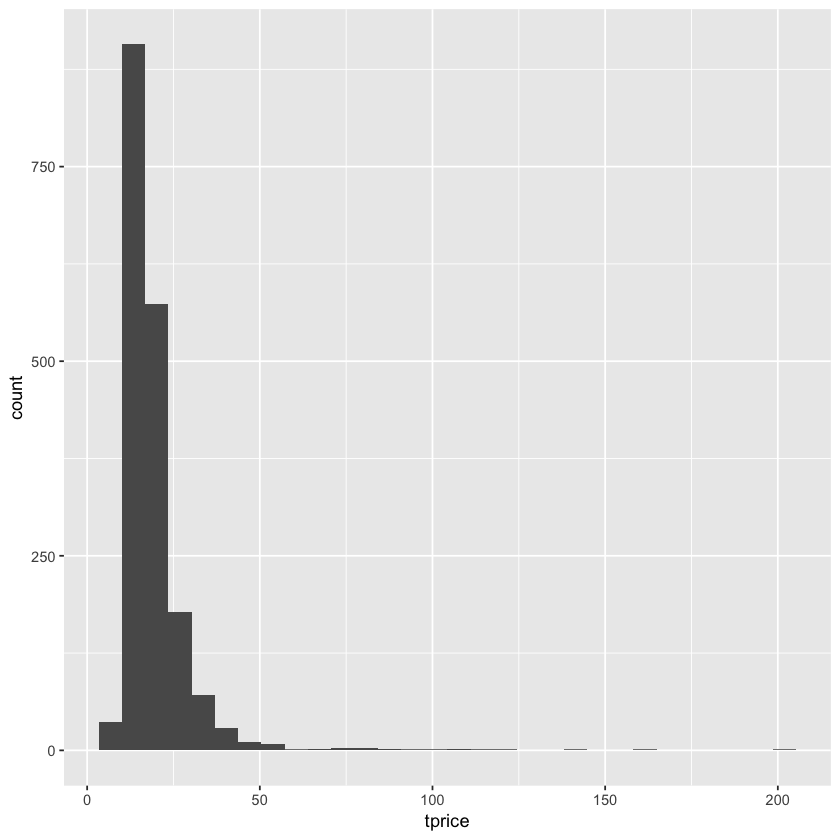

In [20]:
# Plot that
ggplot(totalprice) + geom_histogram(mapping = aes(x = tprice))

Can you locate your order habit in the plot above? I think the plot will be more informative if we look at only order below 20 bucks and select a smaller binwidth.

### Q5: Change the plot in Q4 such that we look only at orders below 20 and use a smaller binwidth.

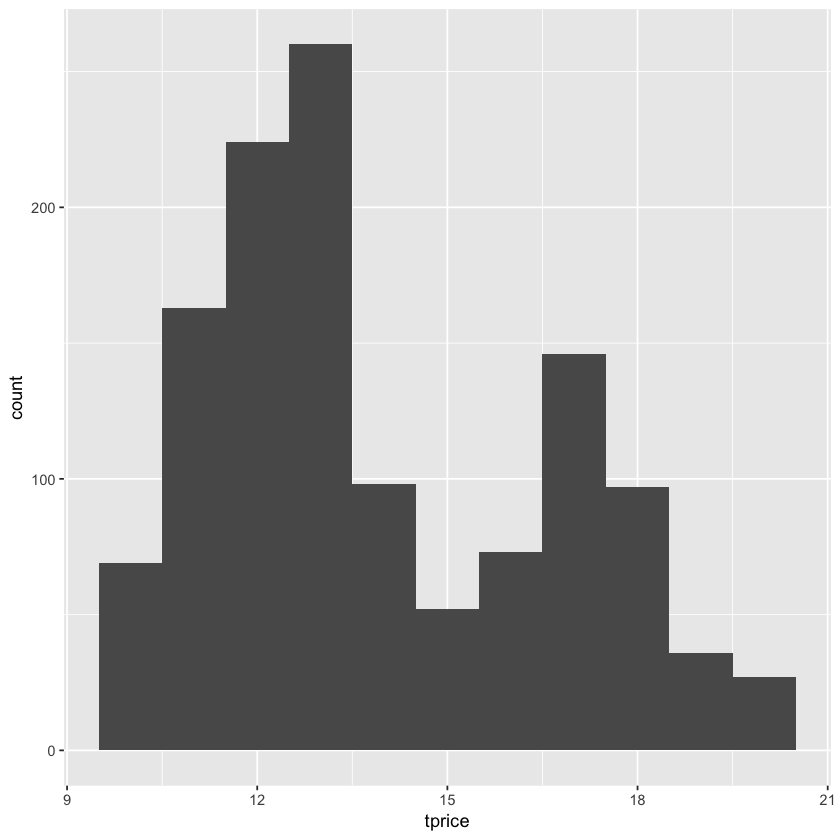

In [21]:
totalprice <- df %>% group_by(order_id) %>% summarise(tprice = sum(item_price)) %>% filter(tprice < 20)
ggplot(totalprice) + geom_histogram(mapping = aes(x = tprice), binwidth = 1)

How does your spending habits at Chipotle compare to those who are in the dataset?

### Q6: Are bowls more popular or burritos more popular? Create a bar plot where the y axis is the amount sold, and the x axis contains one bar for bowl, one bar for burrito.

In [22]:
# table for the total price of each order 
df <- df %>% mutate(category = case_when(grepl("Bowl",item_name) ~ "Bowl",
                                         grepl("Burrito",item_name) ~ "Burrito",
                                         TRUE ~ "neither"))
bowburtable <- df %>% filter(category != "neither") 


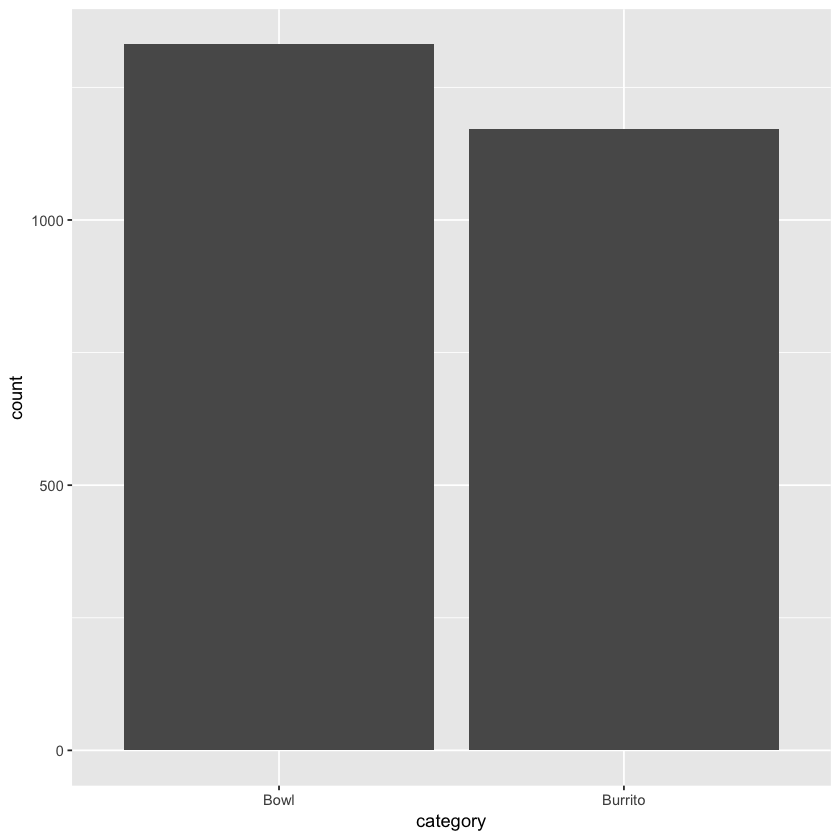

In [23]:
# Plot that
ggplot(bowburtable) + geom_bar(mapping = aes(x = category))

In [26]:
unique(df$item_name)

[1] "Chips and Fresh Tomato Salsa"         
 [2] "Izze"                                 
 [3] "Nantucket Nectar"                     
 [4] "Chips and Tomatillo-Green Chili Salsa"
 [5] "Chicken Bowl"                         
 [6] "Side of Chips"                        
 [7] "Steak Burrito"                        
 [8] "Steak Soft Tacos"                     
 [9] "Chips and Guacamole"                  
[10] "Chicken Crispy Tacos"                 
[11] "Chicken Soft Tacos"                   
[12] "Chicken Burrito"                      
[13] "Canned Soda"                          
[14] "Barbacoa Burrito"                     
[15] "Carnitas Burrito"                     
[16] "Carnitas Bowl"                        
[17] "Bottled Water"                        
[18] "Chips and Tomatillo Green Chili Salsa"
[19] "Barbacoa Bowl"                        
[20] "Chips"                                
[21] "Chicken Salad Bowl"                   
[22] "Steak Bowl"                           
[23] "Barbacoa Soft Tacos"                  
[24] "Veggie Burrito"                       
[25] "Veggie Bowl"                          
[26] "Steak Crispy Tacos"                   
[27] "Chips and Tomatillo Red Chili Salsa"  
[28] "Barbacoa Crispy Tacos"                
[29] "Veggie Salad Bowl"                    
[30] "Chips and Roasted Chili-Corn Salsa"   
[31] "Chips and Roasted Chili Corn Salsa"   
[32] "Carnitas Soft Tacos"                  
[33] "Chicken Salad"                        
[34] "Canned Soft Drink"                    
[35] "Steak Salad Bowl"                     
[36] "6 Pack Soft Drink"                    
[37] "Chips and Tomatillo-Red Chili Salsa"  
[38] "Bowl"                                 
[39] "Burrito"                              
[40] "Crispy Tacos"                         
[41] "Carnitas Crispy Tacos"                
[42] "Steak Salad"                          
[43] "Chips and Mild Fresh Tomato Salsa"    
[44] "Veggie Soft Tacos"                    
[45] "Carnitas Salad Bowl"                  
[46] "Barbacoa Salad Bowl"                  
[47] "Salad"                                
[48] "Veggie Crispy Tacos"                  
[49] "Veggie Salad"                         
[50] "Carnitas Salad"

### Q7: What percentage of orders contain at least one drink of any kind?

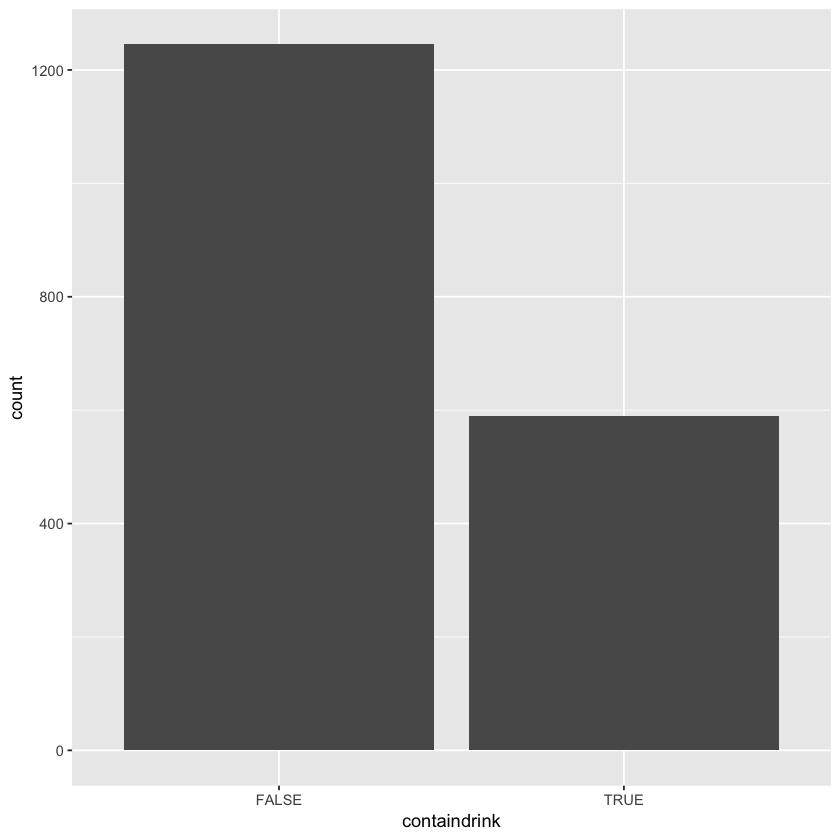

In [29]:
df <- df %>% mutate(ifdrink = grepl("Drink|Water|Soda|Izze|Nantucket Nectar", item_name))
drinkbyorder <- df %>% group_by(order_id) %>% summarise(containdrink = sum(ifdrink) > 0) 
ggplot(drinkbyorder) + geom_bar(mapping = aes(x = containdrink))

### Bonus Question: Suppose for any non drink item sold, 20% of the price is profit, for any drink sold, 85% is profit. According to our data, what percentage of total profit comes from drinks?

### Final thoughts:
- Chicken bowl (761) > Chicken burrito (591), but steak bowl (221) < steak burrito (396). Why?
- How can our result in Q7 overestimate or underestimator customer level drink purchase percentage.